# Housing and Wages in Humboldt County A Quarter-Century Analysis

### Introduction
Housing affordability is a pressing issue in California, particularly in Humboldt County, where rental prices have surged in recent years. Low- and middle-income residents increasingly struggle to secure housing as wages fail to keep pace with rent increases. This project aims to analyze historical and current housing trends, leveraging data science methodologies to identify key factors influencing rental prices and affordability across different regions of Humboldt County. By understanding these trends, we seek to provide insights into future housing affordability and the potential impact of economic and policy changes.


### Objective
This study will explore key research questions, including:     
-How has rental affordability changed in Humboldt County over the past 25 years?(Priority)    
-Which cities in Humboldt County are most and least affordable based on rent-to-income ratios?    
-Are wages increasing at the same rate as rental prices?    
-Which areas are experiencing the fastest rent increases, indicating potential gentrification trends?    
-How did COVID-19 impact housing prices compared to income levels, and what was the effect on eviction rates?    


### Methods
We will be using datasets from the following sources:    
https://www.bls.gov/cew/downloadable-data-files.htm    
https://www.freddiemac.com/pmms    
https://www.humboldt.edu/economic-index    

These datasets obtain data: weekly, monthly, and quarterly.    
For this research we will be focusing on analyzing quarterly data.
    

In [1]:
import re
import numpy as np
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt

## Introduction to the BLS Quarterly Census of Employment and Wages (QCEW) Dataset
The Quarterly Census of Employment and Wages (QCEW) is a comprehensive dataset provided by the U.S. Bureau of Labor Statistics (BLS). It offers detailed insights into employment and wage trends across industries, ownership structures, and geographic locations in the United States. The dataset is derived from unemployment insurance (UI) tax records collected from over 95% of U.S. jobs, making it one of the most reliable sources for tracking employment and wage dynamics.


## Key Variables in the Dataset
The QCEW dataset provides quarterly and annual statistics on:

Employment levels (monthly employment counts per quarter)

Total quarterly wages (sum of wages paid by employers)

Taxable quarterly wages (wages subject to UI tax)

Quarterly employer contributions (UI tax contributions made by businesses)

Number of establishments (business units reporting UI-covered employment)

Average weekly wages (total wages divided by employment)

In [2]:
#We can use dictionaries to store CSV. into DataFrames
humboldt_wages = {}

#Loop through the years from 2000 to 2024
for year in range(2000, 2025):
    filename = f"{year}.q1-q4 06023 Humboldt County, California.csv"
    
    try:
        df = pd.read_csv(filename)
        humboldt_wages[f"HCW_{year}"] = df #Store in dictionary
        print(f"Loaded {filename} successfully.")
    except FileNotFoundError:
        print(f"File {filename} not found, skipping.")
        
#Check the loaded Dataframes
print(humboldt_wages.keys()) #Shows all years successfully loaded

Loaded 2000.q1-q4 06023 Humboldt County, California.csv successfully.
Loaded 2001.q1-q4 06023 Humboldt County, California.csv successfully.
Loaded 2002.q1-q4 06023 Humboldt County, California.csv successfully.
Loaded 2003.q1-q4 06023 Humboldt County, California.csv successfully.
Loaded 2004.q1-q4 06023 Humboldt County, California.csv successfully.
Loaded 2005.q1-q4 06023 Humboldt County, California.csv successfully.
Loaded 2006.q1-q4 06023 Humboldt County, California.csv successfully.
Loaded 2007.q1-q4 06023 Humboldt County, California.csv successfully.
Loaded 2008.q1-q4 06023 Humboldt County, California.csv successfully.
Loaded 2009.q1-q4 06023 Humboldt County, California.csv successfully.
Loaded 2010.q1-q4 06023 Humboldt County, California.csv successfully.
Loaded 2011.q1-q4 06023 Humboldt County, California.csv successfully.
Loaded 2012.q1-q4 06023 Humboldt County, California.csv successfully.
Loaded 2013.q1-q4 06023 Humboldt County, California.csv successfully.
Loaded 2014.q1-q4 06

### What do we have in our dataset?

In [3]:
#loop through all loaded df and print column names
for year, df in humboldt_wages.items():
    print(f"Columns for {year}: {df.columns.tolist()}")

Columns for HCW_2000: ['area_fips', 'own_code', 'industry_code', 'agglvl_code', 'size_code', 'year', 'qtr', 'disclosure_code', 'area_title', 'own_title', 'industry_title', 'agglvl_title', 'size_title', 'qtrly_estabs_count', 'month1_emplvl', 'month2_emplvl', 'month3_emplvl', 'total_qtrly_wages', 'taxable_qtrly_wages', 'qtrly_contributions', 'avg_wkly_wage', 'lq_disclosure_code', 'lq_qtrly_estabs_count', 'lq_month1_emplvl', 'lq_month2_emplvl', 'lq_month3_emplvl', 'lq_total_qtrly_wages', 'lq_taxable_qtrly_wages', 'lq_qtrly_contributions', 'lq_avg_wkly_wage', 'oty_disclosure_code', 'oty_qtrly_estabs_count_chg', 'oty_qtrly_estabs_count_pct_chg', 'oty_month1_emplvl_chg', 'oty_month1_emplvl_pct', 'oty_month2_emplvl_chg', 'oty_month2_emplvl_pct', 'oty_month3_emplvl_chg', 'oty_month3_emplvl_pct', 'oty_total_qtrly_wages_chg', 'oty_total_qtrly_wages_pct', 'oty_taxable_qtrly_wages_chg', 'oty_taxable_qtrly_wages_chg.1', 'oty_qtrly_contributions_chg', 'oty_qtrly_contributions_pct', 'oty_avg_wkly_wag

### Hmmm now this is useful but a bit messy, we cna use a set to tiddy things up.

In [4]:
#Initiate an empty set to store unique column names
unique_columns = set()

#loop through all df and add their columns to the set
for year, df in humboldt_wages.items():
    unique_columns.update(df.columns)
    
#convert the set to sorted list    
unique_columns_list = sorted(unique_columns)
   
print("Unique columns across all years:")
print(unique_columns_list)

Unique columns across all years:
['agglvl_code', 'agglvl_title', 'area_fips', 'area_title', 'avg_wkly_wage', 'disclosure_code', 'industry_code', 'industry_title', 'lq_avg_wkly_wage', 'lq_disclosure_code', 'lq_month1_emplvl', 'lq_month2_emplvl', 'lq_month3_emplvl', 'lq_qtrly_contributions', 'lq_qtrly_estabs_count', 'lq_taxable_qtrly_wages', 'lq_total_qtrly_wages', 'month1_emplvl', 'month2_emplvl', 'month3_emplvl', 'oty_avg_wkly_wage_chg', 'oty_avg_wkly_wage_pct', 'oty_avg_wkly_wage_pct_chg', 'oty_disclosure_code', 'oty_month1_emplvl_chg', 'oty_month1_emplvl_pct', 'oty_month1_emplvl_pct_chg', 'oty_month2_emplvl_chg', 'oty_month2_emplvl_pct', 'oty_month2_emplvl_pct_chg', 'oty_month3_emplvl_chg', 'oty_month3_emplvl_pct', 'oty_month3_emplvl_pct_chg', 'oty_qtrly_contributions_chg', 'oty_qtrly_contributions_pct', 'oty_qtrly_contributions_pct_chg', 'oty_qtrly_estabs_count_chg', 'oty_qtrly_estabs_count_pct_chg', 'oty_taxable_qtrly_wages_chg', 'oty_taxable_qtrly_wages_chg.1', 'oty_taxable_qtrly_

### Almost there, we forgot to space these out.

In [5]:
# Initialize an empty set to store unique column names
unique_columns = set()

# Loop through all DataFrames and add their columns to the set
for year, df in humboldt_wages.items():
    unique_columns.update(df.columns)

# Convert the set to a sorted list
unique_columns_list = sorted(unique_columns)

# Join the list into a single string with newlines
unique_columns_str = "\n".join(unique_columns_list)

# Print the unique columns with newlines
print("Unique columns across all years:\n")
print(unique_columns_str)


Unique columns across all years:

agglvl_code
agglvl_title
area_fips
area_title
avg_wkly_wage
disclosure_code
industry_code
industry_title
lq_avg_wkly_wage
lq_disclosure_code
lq_month1_emplvl
lq_month2_emplvl
lq_month3_emplvl
lq_qtrly_contributions
lq_qtrly_estabs_count
lq_taxable_qtrly_wages
lq_total_qtrly_wages
month1_emplvl
month2_emplvl
month3_emplvl
oty_avg_wkly_wage_chg
oty_avg_wkly_wage_pct
oty_avg_wkly_wage_pct_chg
oty_disclosure_code
oty_month1_emplvl_chg
oty_month1_emplvl_pct
oty_month1_emplvl_pct_chg
oty_month2_emplvl_chg
oty_month2_emplvl_pct
oty_month2_emplvl_pct_chg
oty_month3_emplvl_chg
oty_month3_emplvl_pct
oty_month3_emplvl_pct_chg
oty_qtrly_contributions_chg
oty_qtrly_contributions_pct
oty_qtrly_contributions_pct_chg
oty_qtrly_estabs_count_chg
oty_qtrly_estabs_count_pct_chg
oty_taxable_qtrly_wages_chg
oty_taxable_qtrly_wages_chg.1
oty_taxable_qtrly_wages_pct_chg
oty_total_qtrly_wages_chg
oty_total_qtrly_wages_pct
oty_total_qtrly_wages_pct_chg
own_code
own_title
qtr
qt

### Viola! There we go!

### But what do these columns mean?

| Field Name | Description |
|------------|------------|
| `area_fips` | 5-character FIPS code |
| `own_code` | 1-character Ownership code |
| `industry_code` | 6-character Industry Code (NAICS, SuperSector) |
| `agglvl_code` | 2-character aggregation level code |
| `size_code` | 1-character size code |
| `year` | 4-character year |
| `qtr` | 1-character quarter (always A for annual) |
| `disclosure_code` | 1-character disclosure code (either ' ' (blank) or 'N' not disclosed) |
| `area_title` | Multi-character area title associated with the area's FIPS (Excluded from singlefile) |
| `own_title` | Multi-character ownership title associated with the ownership code (Excluded from singlefile) |
| `industry_title` | Multi-character industry title associated with the industry code (Excluded from singlefile) |
| `agglvl_title` | Multi-character aggregation title associated with the agglvl code (Excluded from singlefile) |
| `size_title` | Multi-character size title associated with the size code (Excluded from singlefile) |
| `annual_avg_estabs` | Annual average of quarterly establishment counts for a given year |
| `annual_avg_emplvl` | Annual average of monthly employment levels for a given year |
| `total_annual_wages` | Sum of the four quarterly total wage levels for a given year |
| `taxable_annual_wages` | Sum of the four quarterly total taxable wage totals for a given year |
| `annual_contributions` | Sum of the four quarterly contribution totals for a given year |
| `annual_avg_wkly_wage` | Average weekly wage based on the 12-monthly employment levels and total annual wage levels |
| `avg_annual_pay` | Average annual pay based on employment and wage levels for a given year |
| `lq_disclosure_code` | 1-character location-quotient disclosure code (either '' (blank) or 'N' not disclosed) |
| `lq_annual_avg_estabs` | Location quotient of annual average establishment count relative to the U.S. (Rounded to hundredths place) |
| `lq_annual_avg_emplvl` | Location quotient of annual average employment relative to the U.S. (Rounded to hundredths place) |
| `lq_total_annual_wages` | Location quotient of total annual wages relative to the U.S. (Rounded to hundredths place) |
| `lq_taxable_annual_wages` | Location quotient of taxable annual wages relative to the U.S. (Rounded to hundredths place) |
| `lq_annual_contributions` | Location quotient of total annual contributions relative to the U.S. (Rounded to hundredths place) |
| `lq_annual_avg_wkly_wage` | Location quotient of annual average weekly wage relative to the U.S. (Rounded to hundredths place) |
| `lq_avg_annual_pay` | Location quotient of annual average pay relative to the U.S. (Rounded to hundredths place) |
| `oty_disclosure_code` | 1-character over-the-year disclosure code (either ' ' (blank) or 'N' not disclosed) |
| `oty_annual_avg_estabs_chg` | Over-the-year change in annual average establishments for a given year |
| `oty_annual_avg_estabs_pct_chg` | Over-the-year percent change in annual average establishments for a given year (Rounded to the tenths place) |
| `oty_annual_avg_emplvl_chg` | Over-the-year change in annual average employment for a given year |
| `oty_annual_avg_emplvl_pct_chg` | Over-the-year percent change in annual average employment for a given year (Rounded to the tenths place) |
| `oty_total_annual_wages_chg` | Over-the-year change in the total annual wages for a given year |
| `oty_total_annual_wages_pct_chg` | Over-the-year percent change in total annual wages for a given year (Rounded to the tenths place) |
| `oty_taxable_annual_wages_chg` | Over-the-year change in taxable annual wages for a given year |
| `oty_taxable_annual_wages_pct_chg` | Over-the-year percent change in taxable annual wages for a given year (Rounded to the tenths place) |
| `oty_annual_contributions_chg` | Over-the-year change in annual contributions for a given year |
| `oty_annual_contributions_pct_chg` | Over-the-year percent change in annual contributions for a given year (Rounded to the tenths place) |
| `oty_annual_avg_wkly_wage_chg` | Over-the-year change in annual average weekly wage for a given year |
| `oty_annual_avg_wkly_wage_pct_chg` | Over-the-year percent change in annual average weekly wage for a given year (Rounded to the tenths place) |
| `oty_avg_annual_pay_chg` | Over-the-year change in average annual pay for a given year |
| `oty_avg_annual_pay_pct_chg` | Over-the-year percent change in average annual pay for a given year (Rounded to the tenths place) |


### Wow that is quite a number of columns?!
### We will only be using a selected few and others we will manually calculate.

### We only want to keep the following columns additionally some columns relate to others as described below:
    own_code = own_title
    industry_code = industry_title
    agglvl_code = agglvl_title
    year
    qtr
    annual_avg_estabs
    annual_avg_emplvl
    total_annual_wages
    taxable_annual_wages
    annual_avg_wkly_wage
    avg_annual_pay    
    
    

In [6]:
columns_to_drop = [
    
    #These are redundant
    "area_fips", "area_title", "size_code", "size_title", 
    
    #Disclosure codes, only needed for privacy filtering
    "disclosure_code", "lq_disclosure_code", "oty_disclosure_code",
    
    #Location Quotients, only needed if comparing to national levels
    "lq_annual_avg_estabs", "lq_annual_avg_emplvl", "lq_total_annual_wages",
    "lq_taxable_annual_wages", "lq_annual_contributions", "lq_annual_avg_wkly_wage",
    "lq_avg_annual_pay",

    #Over the year Percantage Changes, we will doing our own as these have missing values
    "oty_annual_avg_estabs_pct_chg", "oty_annual_avg_estabs_pct_chg",
    "oty_annual_avg_emplvl_chg", "oty_annual_avg_emplvl_pct_chg",
    "oty_total_annual_wages_chg", "oty_total_annual_wages_pct_chg",
    "oty_taxable_annual_wages_chg", "oty_taxable_annual_wages_pct_chg",
    "oty_annual_contributions_chg", "oty_annual_contributions_pct_chg",
    "oty_annual_avg_wkly_wage_chg", "oty_annual_avg_wkly_wage_pct_chg",
    "oty_avg_annual_pay_chg", "oty_avg_annual_pay_pct_chg"
]

#We are going to loop through each DataFrame in the dictionary and drop the columns
for year, df in humboldt_wages.items():
    humboldt_wages[year] = df.drop(columns=columns_to_drop, errors="ignore") #prevent errors if a column is not found

### We would also like to take the time to rename some columns to make the descriptions clearer.

In [7]:
rename_mapping = {
    "own_code": "Ownership Structure",
    "own_title": "Industry Sector",
    "industry_code": "NAICS Classification",

    # Key Employment and Wage Data
    "annual_avg_estabs": "Annual Avg Establishments",
    "annual_avg_emplvl": "Annual Avg Employment Level",
    "total_annual_wages": "Total Annual Wages",
    "taxable_annual_wages": "Taxable Annual Wages",
    "annual_avg_wkly_wage": "Annual Avg Weekly Wage",
    "avg_annual_pay": "Avg Annual Pay",

    # Year-over-Year Changes: Decided to create our own changes
    #"oty_annual_avg_estabs_chg": "YoY Change in Establishments",
    #"oty_annual_avg_emplvl_chg": "YoY Change in Employment Level",
    #"oty_total_annual_wages_chg": "YoY Change in Total Wages",
    #"oty_taxable_annual_wages_chg": "YoY Change in Taxable Wages",
    #"oty_annual_avg_wkly_wage_chg": "YoY Change in Weekly Wage",
    #"oty_avg_annual_pay_chg": "YoY Change in Avg Annual Pay",
    
    #wage name adjustment: Decide to create our own changes
    #"oty_month3_emplvl_pct": "oty_month3_emplvl_pct_chg",
    #"oty_total_qtrly_wages_pct": "oty_total_qtrly_wages_pct_chg",
    #"oty_taxable_qtrly_wages_chg.1": "oty_taxable_qtrly_wages_pct_chg",
    #"oty_qtrly_contributions_pct": "oty_qtrly_contributions_pct_chg",
    #"oty_avg_wkly_wage_pct": "oty_avg_wkly_wage_pct_chg"
}

for year, df in humboldt_wages.items():
    humboldt_wages[year] = df.rename(columns=rename_mapping)

### Now we can merge all of our dictionary into a single dataframe. Afterwards we can check to see our column data followed by its data type.

In [8]:
#Combine all into one DataFrame
all_years_df = pd.concat(humboldt_wages.values(), ignore_index=True)

#Check merged dataset
print(all_years_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142272 entries, 0 to 142271
Data columns (total 47 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Ownership Structure              142272 non-null  int64  
 1   NAICS Classification             142272 non-null  object 
 2   agglvl_code                      142272 non-null  int64  
 3   year                             142272 non-null  int64  
 4   qtr                              142272 non-null  int64  
 5   Industry Sector                  142272 non-null  object 
 6   industry_title                   142272 non-null  object 
 7   agglvl_title                     142272 non-null  object 
 8   qtrly_estabs_count               142272 non-null  int64  
 9   month1_emplvl                    142272 non-null  int64  
 10  month2_emplvl                    142272 non-null  int64  
 11  month3_emplvl                    142272 non-null  int64  
 12  to

In [9]:
all_years_df.head(10)

,Ownership Structure,NAICS Classification,agglvl_code,year,qtr,Industry Sector,industry_title,agglvl_title,qtrly_estabs_count,month1_emplvl,...,oty_qtrly_contributions_pct,oty_avg_wkly_wage_chg,oty_avg_wkly_wage_pct,oty_month1_emplvl_pct_chg,oty_month2_emplvl_pct_chg,oty_month3_emplvl_pct_chg,oty_total_qtrly_wages_pct_chg,oty_taxable_qtrly_wages_pct_chg,oty_qtrly_contributions_pct_chg,oty_avg_wkly_wage_pct_chg
0,0,10,70,2000,1,Total Covered,"Total, all industries","County, Total Covered",5035,47151,...,0.0,35,8.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,10,70,2000,2,Total Covered,"Total, all industries","County, Total Covered",5057,48852,...,0.0,30,6.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,10,70,2000,3,Total Covered,"Total, all industries","County, Total Covered",5213,47761,...,0.0,15,3.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,10,70,2000,4,Total Covered,"Total, all industries","County, Total Covered",5267,49956,...,0.0,15,3.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,10,71,2000,1,Federal Government,"Total, all industries","County, Total -- by ownership sector",45,889,...,0.0,-34,-5.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,10,71,2000,2,Federal Government,"Total, all industries","County, Total -- by ownership sector",45,1096,...,0.0,-29,-4.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,10,71,2000,3,Federal Government,"Total, all industries","County, Total -- by ownership sector",46,967,...,0.0,-38,-5.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1,10,71,2000,4,Federal Government,"Total, all industries","County, Total -- by ownership sector",46,850,...,0.0,-31,-4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,102,72,2000,1,Federal Government,Service-providing,"County, by Domain -- by ownership sector",45,889,...,0.0,-34,-5.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1,102,72,2000,2,Federal Government,Service-providing,"County, by Domain -- by ownership sector",45,1096,...,0.0,-29,-4.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
all_years_df.tail(10)

,Ownership Structure,NAICS Classification,agglvl_code,year,qtr,Industry Sector,industry_title,agglvl_title,qtrly_estabs_count,month1_emplvl,...,oty_qtrly_contributions_pct,oty_avg_wkly_wage_chg,oty_avg_wkly_wage_pct,oty_month1_emplvl_pct_chg,oty_month2_emplvl_pct_chg,oty_month3_emplvl_pct_chg,oty_total_qtrly_wages_pct_chg,oty_taxable_qtrly_wages_pct_chg,oty_qtrly_contributions_pct_chg,oty_avg_wkly_wage_pct_chg
142262,5,9999,76,2023,3,Private,NAICS 9999 Unclassified,"County, NAICS 4-digit -- by ownership sector",2,0,...,NaN,-537,NaN,0.0,0.0,-50.0,-88.2,-86.6,-86.6,-82.4
142263,5,9999,76,2023,4,Private,NAICS 9999 Unclassified,"County, NAICS 4-digit -- by ownership sector",33,48,...,NaN,-310,NaN,4700.0,5200.0,4900.0,3875.5,3780.4,3780.7,-21.0
142264,5,99999,77,2023,1,Private,NAICS 99999 Unclassified,"County, NAICS 5-digit -- by ownership sector",2,0,...,NaN,0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
142265,5,99999,77,2023,2,Private,NAICS 99999 Unclassified,"County, NAICS 5-digit -- by ownership sector",6,9,...,NaN,-1306,NaN,350.0,400.0,550.0,55.3,11942.0,18333.3,-70.9
142266,5,99999,77,2023,3,Private,NAICS 99999 Unclassified,"County, NAICS 5-digit -- by ownership sector",2,0,...,NaN,-537,NaN,0.0,0.0,-50.0,-88.2,-86.6,-86.6,-82.4
142267,5,99999,77,2023,4,Private,NAICS 99999 Unclassified,"County, NAICS 5-digit -- by ownership sector",33,48,...,NaN,-310,NaN,4700.0,5200.0,4900.0,3875.5,3780.4,3780.7,-21.0
142268,5,999999,78,2023,1,Private,NAICS 999999 Unclassified,"County, NAICS 6-digit -- by ownership sector",2,0,...,NaN,0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
142269,5,999999,78,2023,2,Private,NAICS 999999 Unclassified,"County, NAICS 6-digit -- by ownership sector",6,9,...,NaN,-1306,NaN,350.0,400.0,550.0,55.3,11942.0,18333.3,-70.9
142270,5,999999,78,2023,3,Private,NAICS 999999 Unclassified,"County, NAICS 6-digit -- by ownership sector",2,0,...,NaN,-537,NaN,0.0,0.0,-50.0,-88.2,-86.6,-86.6,-82.4
142271,5,999999,78,2023,4,Private,NAICS 999999 Unclassified,"County, NAICS 6-digit -- by ownership sector",33,48,...,NaN,-310,NaN,4700.0,5200.0,4900.0,3875.5,3780.4,3780.7,-21.0


In [11]:
all_years_df.shape

(142272, 47)

### We realized the data had more columns than that specified in the QCEW Field Layouts for NAICS-Based, Annual CSV Files. Looks like we only obtained the Annual column names.

### Upon review, we realized we had more OTY or Over The Year Percent Changes still remaining in our dataset. For this use case we would like to use our learned skillset to provide this data hence we will eliminate the following:

| #  | Field Name                         | Non-Null Count | Data Type  | Description |
|----|------------------------------------|---------------|-----------|-------------|
| 23 | oty_qtrly_estabs_count_chg        | 142,272       | int64     | Over-the-year change in quarterly establishment count |
| 24 | oty_qtrly_estabs_count_pct_chg    | 142,272       | float64   | Over-the-year percent change in quarterly establishment count |
| 25 | oty_month1_emplvl_chg             | 142,272       | int64     | Over-the-year change in employment level for month 1 |
| 26 | oty_month1_emplvl_pct             | 93,652        | float64   | Over-the-year percent change in employment level for month 1 |
| 27 | oty_month2_emplvl_chg             | 142,272       | int64     | Over-the-year change in employment level for month 2 |
| 28 | oty_month2_emplvl_pct             | 93,652        | float64   | Over-the-year percent change in employment level for month 2 |
| 29 | oty_month3_emplvl_chg             | 142,272       | int64     | Over-the-year change in employment level for month 3 |
| 30 | oty_month3_emplvl_pct             | 93,652        | float64   | Over-the-year percent change in employment level for month 3 |
| 31 | oty_total_qtrly_wages_chg         | 142,272       | int64     | Over-the-year change in total quarterly wages |
| 32 | oty_total_qtrly_wages_pct         | 93,652        | float64   | Over-the-year percent change in total quarterly wages |
| 33 | oty_taxable_qtrly_wages_chg       | 142,272       | int64     | Over-the-year change in taxable quarterly wages |
| 34 | oty_taxable_qtrly_wages_chg.1     | 93,652        | float64   | Over-the-year percent change in taxable quarterly wages |
| 35 | oty_qtrly_contributions_chg       | 142,272       | int64     | Over-the-year change in total quarterly contributions |
| 36 | oty_qtrly_contributions_pct       | 93,652        | float64   | Over-the-year percent change in total quarterly contributions |
| 37 | oty_avg_wkly_wage_chg             | 142,272       | int64     | Over-the-year change in average weekly wage |
| 38 | oty_avg_wkly_wage_pct             | 93,652        | float64   | Over-the-year percent change in average weekly wage |
| 39 | oty_month1_emplvl_pct_chg         | 48,620        | float64   | Over-the-year percent change in employment level for month 1 (subset data) |
| 40 | oty_month2_emplvl_pct_chg         | 48,620        | float64   | Over-the-year percent change in employment level for month 2 (subset data) |
| 41 | oty_month3_emplvl_pct_chg         | 48,620        | float64   | Over-the-year percent change in employment level for month 3 (subset data) |
| 42 | oty_total_qtrly_wages_pct_chg     | 48,620        | float64   | Over-the-year percent change in total quarterly wages (subset data) |
| 43 | oty_taxable_qtrly_wages_pct_chg   | 48,620        | float64   | Over-the-year percent change in taxable quarterly wages (subset data) |
| 44 | oty_qtrly_contributions_pct_chg   | 48,620        | float64   | Over-the-year percent change in total quarterly contributions (subset data) |
| 45 | oty_avg_wkly_wage_pct_chg         | 48,620        | float64   | Over-the-year percent change in average weekly wage (subset data) |


### In order to delete all of the columns containing oty we can use REGEX!

In [12]:
all_years_df = all_years_df.drop(all_years_df.filter(regex=r"^oty_").columns, axis=1)
#a little regex never hurt

In [13]:
all_years_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142272 entries, 0 to 142271
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Ownership Structure     142272 non-null  int64  
 1   NAICS Classification    142272 non-null  object 
 2   agglvl_code             142272 non-null  int64  
 3   year                    142272 non-null  int64  
 4   qtr                     142272 non-null  int64  
 5   Industry Sector         142272 non-null  object 
 6   industry_title          142272 non-null  object 
 7   agglvl_title            142272 non-null  object 
 8   qtrly_estabs_count      142272 non-null  int64  
 9   month1_emplvl           142272 non-null  int64  
 10  month2_emplvl           142272 non-null  int64  
 11  month3_emplvl           142272 non-null  int64  
 12  total_qtrly_wages       142272 non-null  int64  
 13  taxable_qtrly_wages     142272 non-null  int64  
 14  qtrly_contributions 

## AWESOME!!! We will also repeat the same process for lq as we are opting out to compare national levels.

In [14]:
all_years_df = all_years_df.drop(all_years_df.filter(regex=r"^lq_").columns, axis=1)
#a little regex never hurt

In [15]:
all_years_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142272 entries, 0 to 142271
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Ownership Structure   142272 non-null  int64 
 1   NAICS Classification  142272 non-null  object
 2   agglvl_code           142272 non-null  int64 
 3   year                  142272 non-null  int64 
 4   qtr                   142272 non-null  int64 
 5   Industry Sector       142272 non-null  object
 6   industry_title        142272 non-null  object
 7   agglvl_title          142272 non-null  object
 8   qtrly_estabs_count    142272 non-null  int64 
 9   month1_emplvl         142272 non-null  int64 
 10  month2_emplvl         142272 non-null  int64 
 11  month3_emplvl         142272 non-null  int64 
 12  total_qtrly_wages     142272 non-null  int64 
 13  taxable_qtrly_wages   142272 non-null  int64 
 14  qtrly_contributions   142272 non-null  int64 
 15  avg_wkly_wage    

### Amazing! Now we have raw values that we can work with! 
### The advantage of using.info we can see data types column nsames as well as the row counts. So far we have all columns having the same 142,272 values.   

### We definetly want to do some rearranging of columns to make this readable.

In [16]:
# Define the new column order
column_order = [
    'year', 'qtr', 'Ownership Structure', 'Industry Sector', 
    'NAICS Classification', 'industry_title', 
    'agglvl_code', 'agglvl_title', 
    'qtrly_estabs_count', 'month1_emplvl', 'month2_emplvl', 'month3_emplvl',
    'total_qtrly_wages', 'taxable_qtrly_wages', 'qtrly_contributions', 'avg_wkly_wage'
]

# Reorder DataFrame columns
all_years_df = all_years_df[column_order]

# Display the updated DataFrame
all_years_df.head()  # Shows first few rows


,year,qtr,Ownership Structure,Industry Sector,NAICS Classification,industry_title,agglvl_code,agglvl_title,qtrly_estabs_count,month1_emplvl,month2_emplvl,month3_emplvl,total_qtrly_wages,taxable_qtrly_wages,qtrly_contributions,avg_wkly_wage
0,2000,1,0,Total Covered,10,"Total, all industries",70,"County, Total Covered",5035,47151,47675,48510,290964068,0,0,468
1,2000,2,0,Total Covered,10,"Total, all industries",70,"County, Total Covered",5057,48852,49908,50926,318035562,0,0,490
2,2000,3,0,Total Covered,10,"Total, all industries",70,"County, Total Covered",5213,47761,48835,50014,305117365,0,0,480
3,2000,4,0,Total Covered,10,"Total, all industries",70,"County, Total Covered",5267,49956,50066,49859,326820351,0,0,503
4,2000,1,1,Federal Government,10,"Total, all industries",71,"County, Total -- by ownership sector",45,889,913,1255,8427269,0,0,636


### Now let's do searching for null values and duplicated values.

In [17]:
all_years_df.isnull().sum()

year                    0
qtr                     0
Ownership Structure     0
Industry Sector         0
NAICS Classification    0
industry_title          0
agglvl_code             0
agglvl_title            0
qtrly_estabs_count      0
month1_emplvl           0
month2_emplvl           0
month3_emplvl           0
total_qtrly_wages       0
taxable_qtrly_wages     0
qtrly_contributions     0
avg_wkly_wage           0
dtype: int64

### I LOVE IT! No Null Values! Now what about duplicated values?

In [18]:
all_years_df.duplicated().sum()

0

### Awesome now let's move on to crunching some data! We will begin by doing a MACRO Analysis, meaning we will take a look at the big picture before entering the MICRO ANalysis which will alow us to delve deeper into the dataset.

### Let's check to see what Sectors we have in Humboldt County

In [19]:
HCS = all_years_df["Industry Sector"].unique()
HCS

array(['Total Covered', 'Federal Government', 'State Government',
       'Local Government', 'Private'], dtype=object)

### Let's obtain a macro-level analysis for the years 2000-2024, where we concatonate Q1-Q4 for each industry sector.    
### Our main goal here is to observe annual trends by industry across employment, wages, and establishments.

In [20]:
Hum_Co_Macro = all_years_df.groupby(["year", "Industry Sector"]).agg({
    "qtrly_estabs_count": "mean",  # Average over four quarters
    "month1_emplvl": "mean",  # Average Q1-Q4 for employment
    "month2_emplvl": "mean",
    "month3_emplvl": "mean",
    "total_qtrly_wages": "sum",  # Sum wages for annual total
    "taxable_qtrly_wages": "sum",
    "qtrly_contributions": "sum",
    "avg_wkly_wage": "mean",  # Average weekly wage over four quarters
}).reset_index()

# Compute annual average employment (across 3 months)
Hum_Co_Macro["avg_annual_emplvl"] = Hum_Co_Macro[["month1_emplvl", "month2_emplvl", "month3_emplvl"]].mean(axis=1)

# Drop individual monthly employment columns after averaging
Hum_Co_Macro.drop(columns=["month1_emplvl", "month2_emplvl", "month3_emplvl"], inplace=True)

# Preview aggregated data

Hum_Co_Macro.head()

,year,Industry Sector,qtrly_estabs_count,total_qtrly_wages,taxable_qtrly_wages,qtrly_contributions,avg_wkly_wage,avg_annual_emplvl
0,2000,Federal Government,5.600000,288960328,0,0,758.284615,126.492308
1,2000,Local Government,46.461538,845974354,0,0,527.307692,2327.019231
2,2000,Private,84.974116,5891993798,0,0,398.081439,651.403620
3,2000,State Government,88.388889,687602578,0,0,850.250000,874.814815
4,2000,Total Covered,5143.000000,1240937346,0,0,485.250000,49126.083333


### We can now visualize this Macro trend.

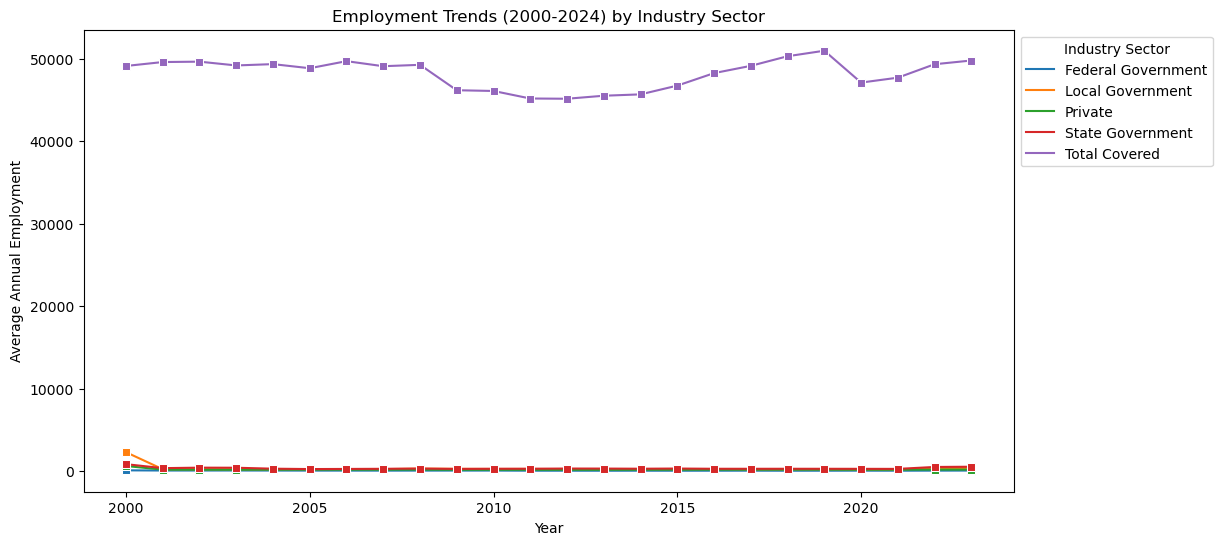

In [21]:
plt.figure(figsize=(12,6))
sns.lineplot(data=Hum_Co_Macro, x="year", y="avg_annual_emplvl", hue="Industry Sector", marker="s")
plt.title("Employment Trends (2000-2024) by Industry Sector")
plt.xlabel("Year")
plt.ylabel("Average Annual Employment")
plt.legend(title="Industry Sector", bbox_to_anchor=(1,1))
plt.show()

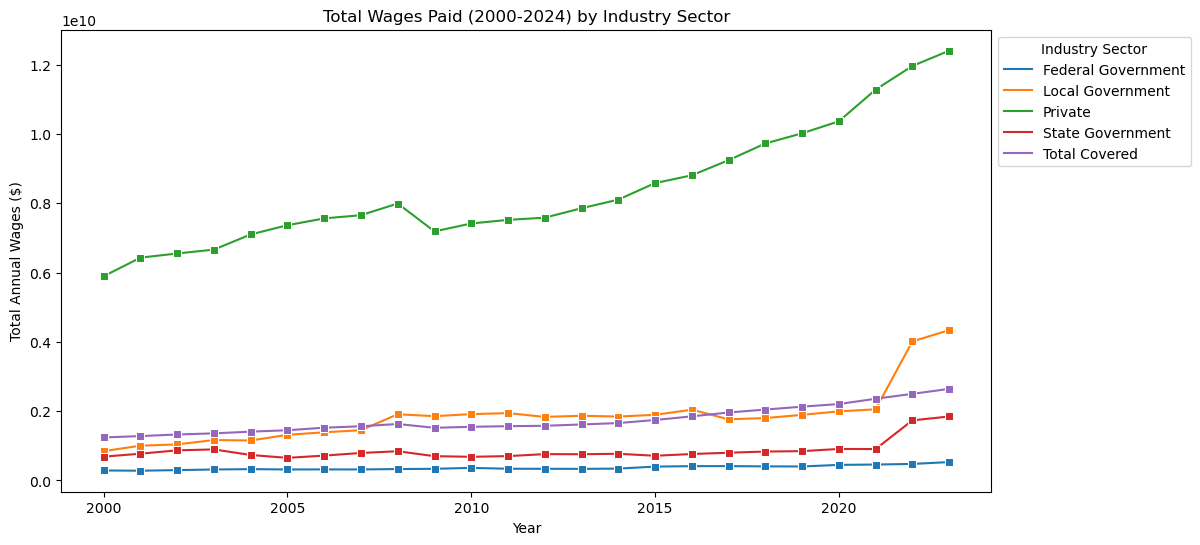

In [22]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=Hum_Co_Macro, x="year", y="total_qtrly_wages", hue="Industry Sector", marker="s")
plt.title("Total Wages Paid (2000-2024) by Industry Sector")
plt.xlabel("Year")
plt.ylabel("Total Annual Wages ($)")
plt.legend(title="Industry Sector", bbox_to_anchor=(1, 1))
plt.show()


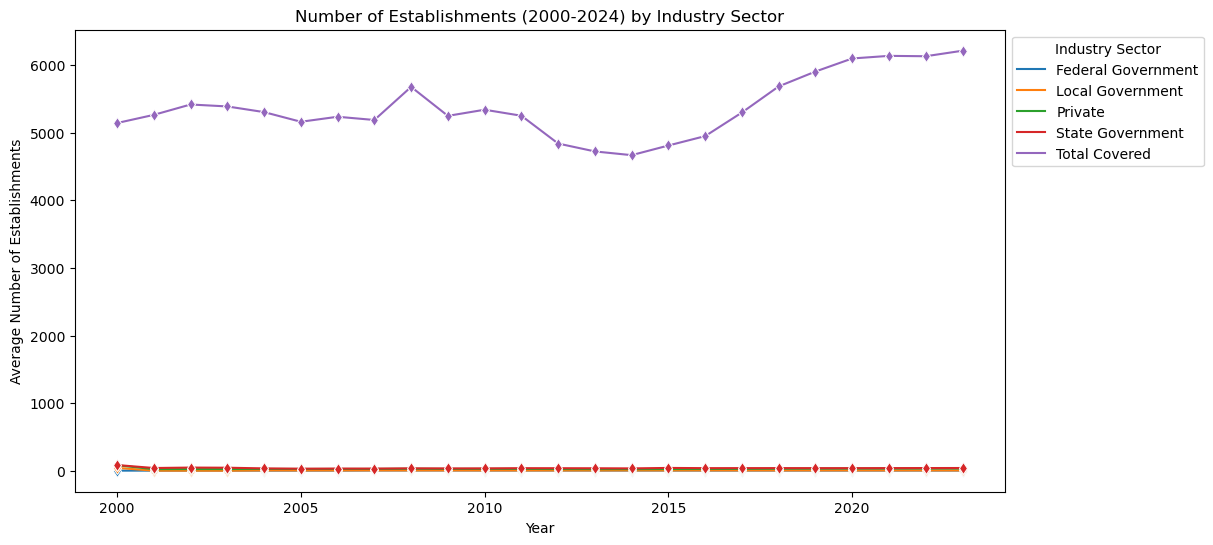

In [23]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=Hum_Co_Macro, x="year", y="qtrly_estabs_count", hue="Industry Sector", marker="d")
plt.title("Number of Establishments (2000-2024) by Industry Sector")
plt.xlabel("Year")
plt.ylabel("Average Number of Establishments")
plt.legend(title="Industry Sector", bbox_to_anchor=(1, 1))
plt.show()


### Let's see what we can find out from this data by preserving industry differences. This way we obtain accurate employment and wage data as opposed to having all of the sectors in one graph.

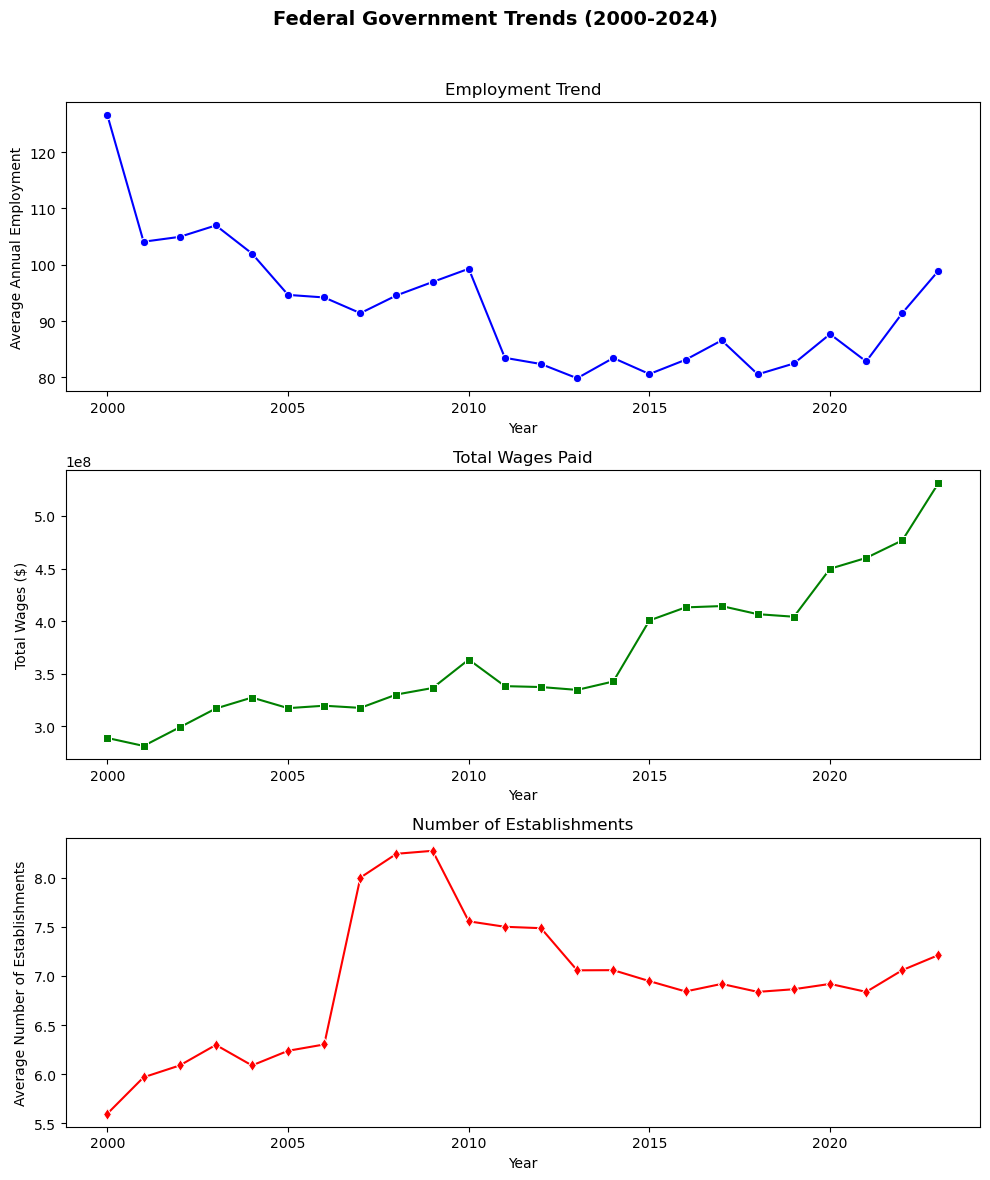

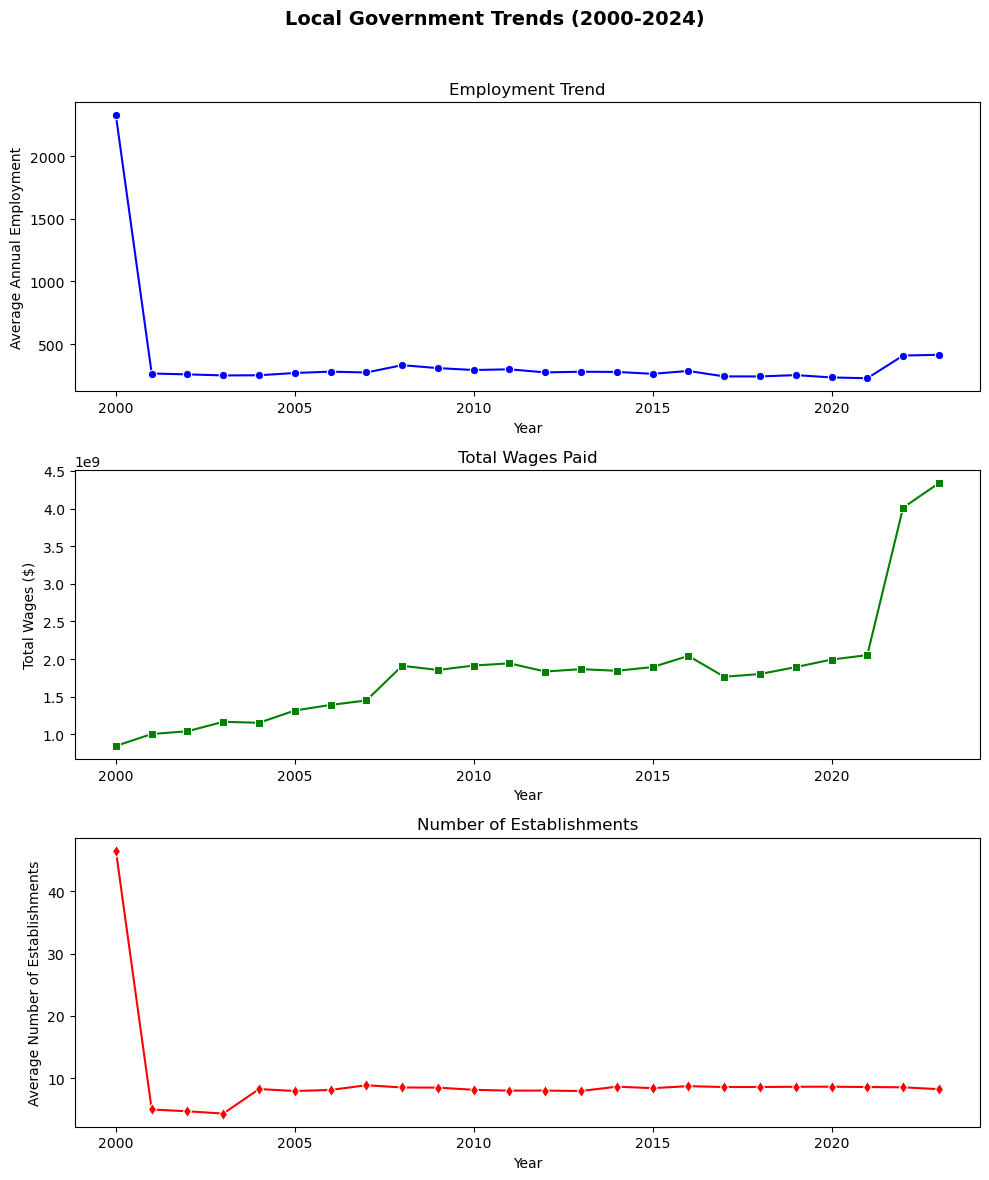

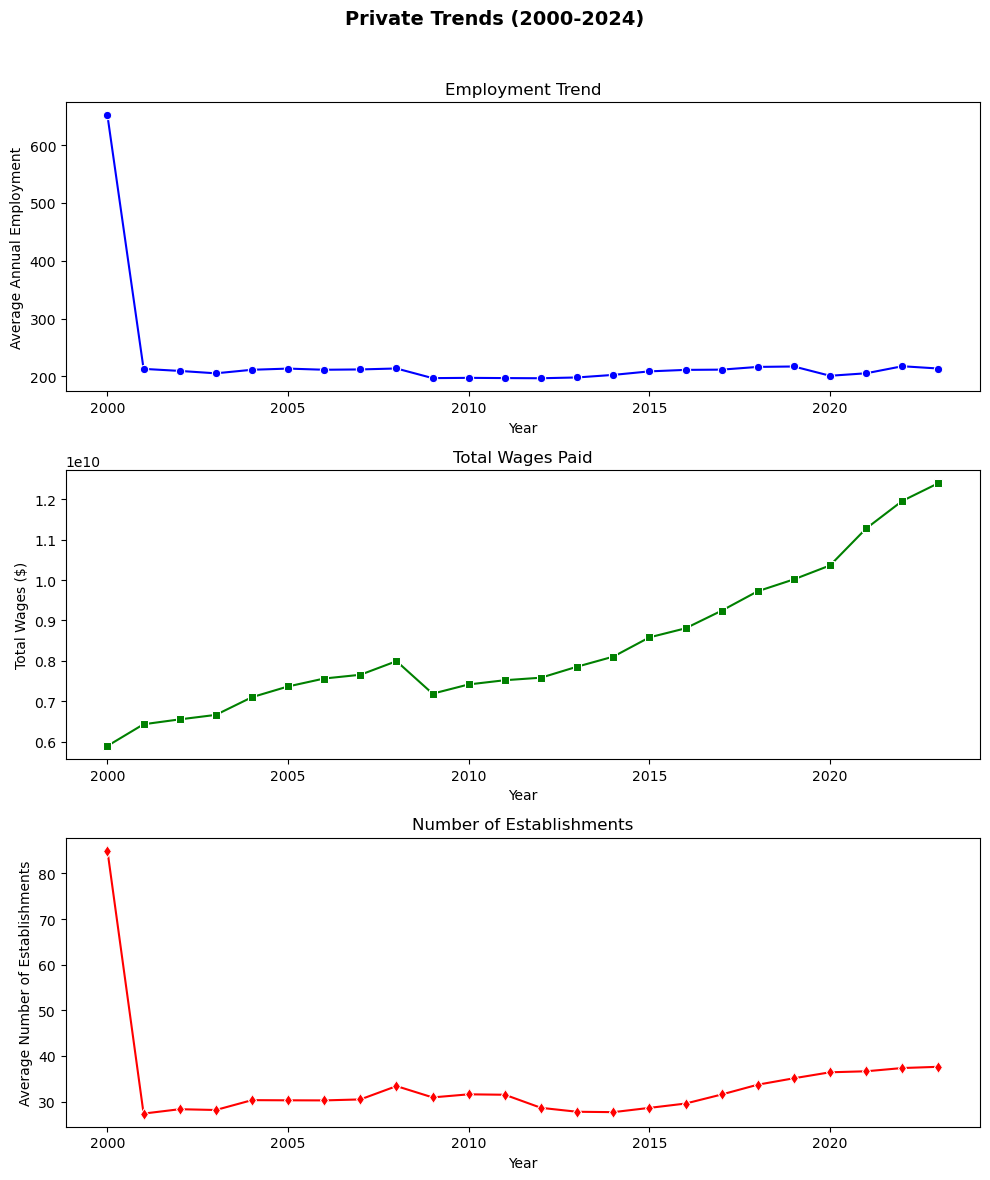

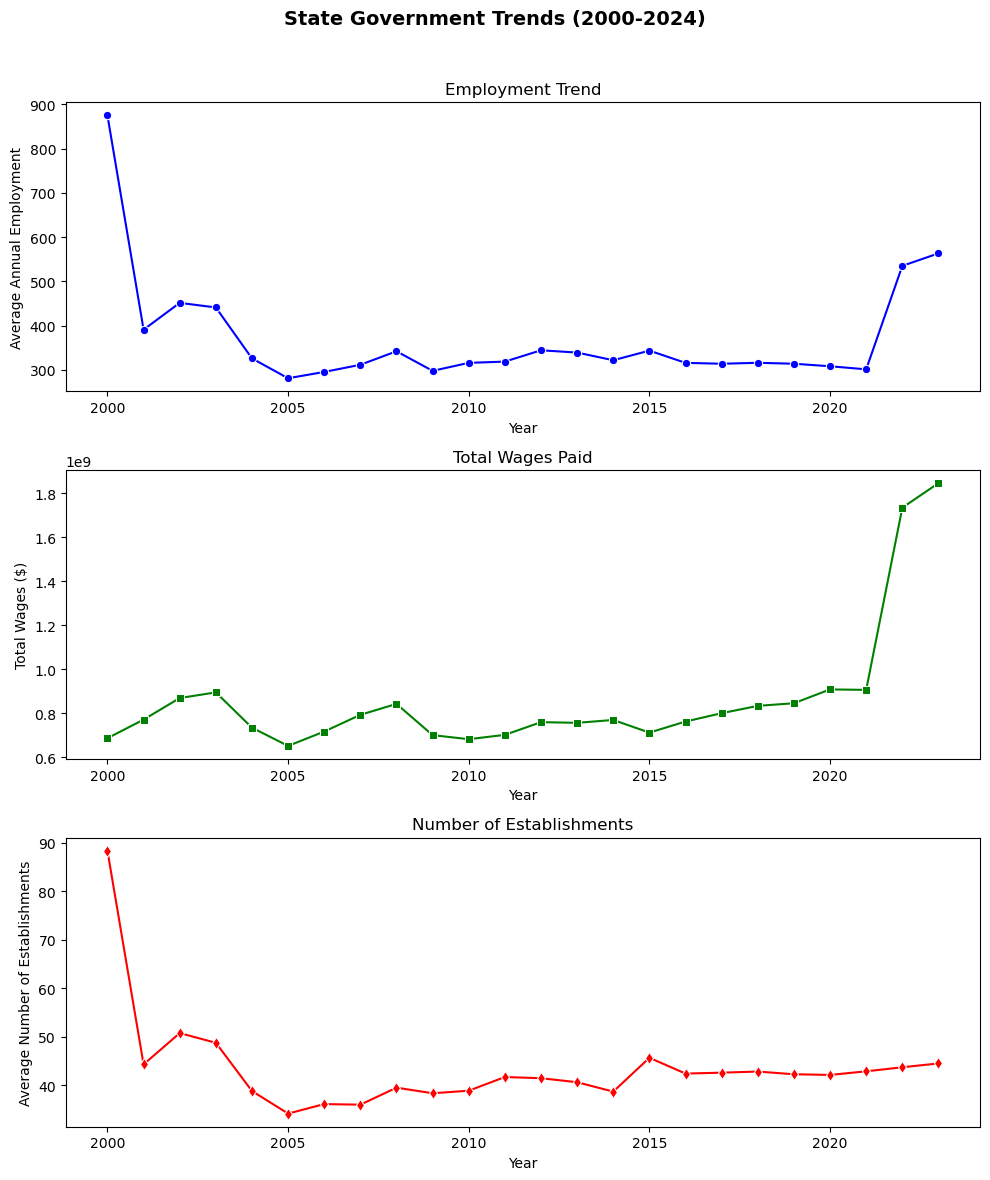

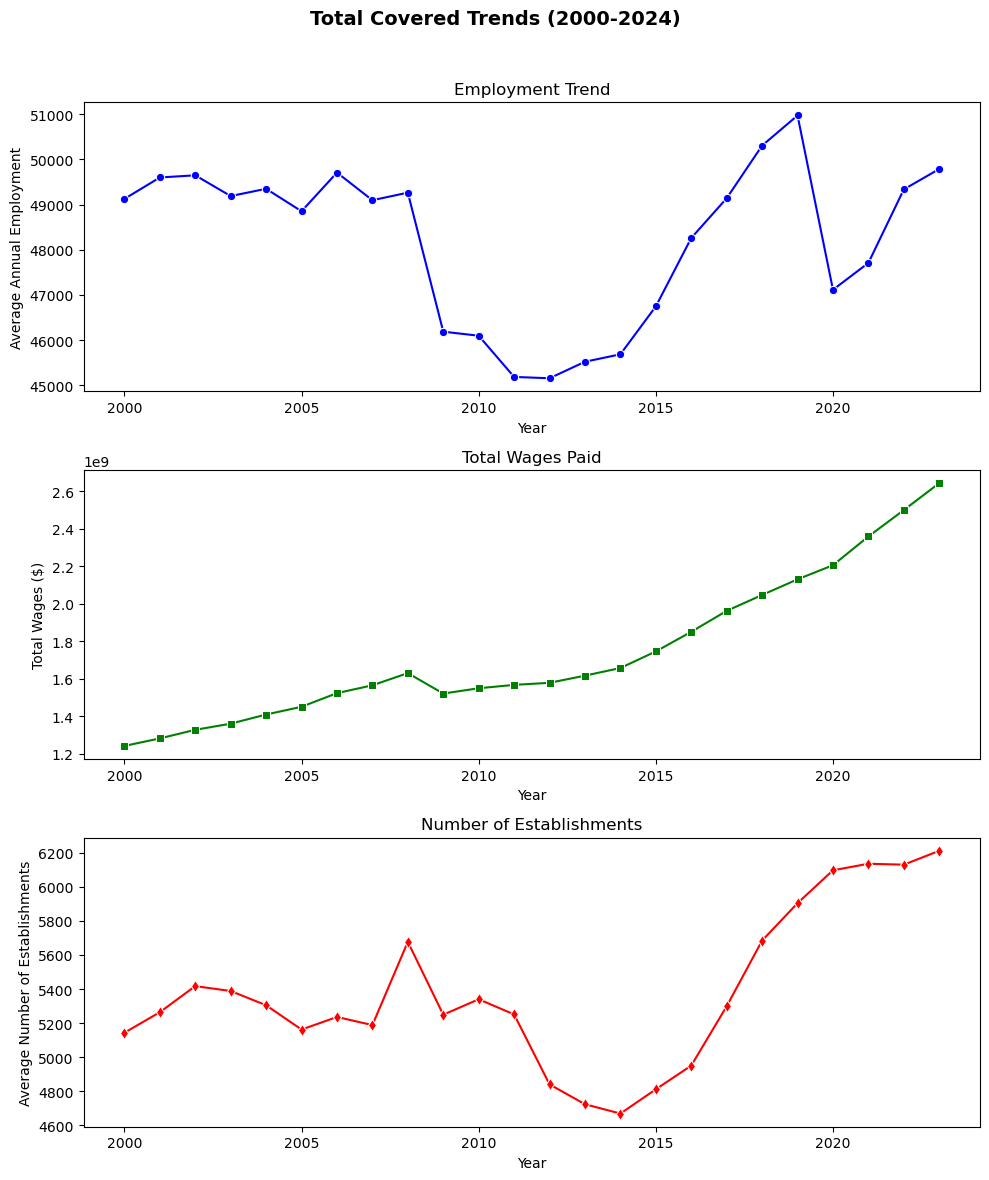

In [24]:
industry_sectors = Hum_Co_Macro["Industry Sector"].unique()

# Create a separate plot for each sector
for sector in industry_sectors:
    sector_df = Hum_Co_Macro[Hum_Co_Macro["Industry Sector"] == sector]

    fig, axes = plt.subplots(3, 1, figsize=(10, 12))
    fig.suptitle(f"{sector} Trends (2000-2024)", fontsize=14, fontweight="bold")

    # Employment Trend
    sns.lineplot(data=sector_df, x="year", y="avg_annual_emplvl", marker="o", ax=axes[0], color="blue")
    axes[0].set_title("Employment Trend")
    axes[0].set_xlabel("Year")
    axes[0].set_ylabel("Average Annual Employment")

    # Total Wages Paid
    sns.lineplot(data=sector_df, x="year", y="total_qtrly_wages", marker="s", ax=axes[1], color="green")
    axes[1].set_title("Total Wages Paid")
    axes[1].set_xlabel("Year")
    axes[1].set_ylabel("Total Wages ($)")

    # Number of Establishments
    sns.lineplot(data=sector_df, x="year", y="qtrly_estabs_count", marker="d", ax=axes[2], color="red")
    axes[2].set_title("Number of Establishments")
    axes[2].set_xlabel("Year")
    axes[2].set_ylabel("Average Number of Establishments")

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit title
    plt.show()

### We can also do a Micro analysis to see deeper into the dataset.

### Let's begin with Quarter 1

In [25]:
HCS_q1 = all_years_df[all_years_df["qtr"] == 1]

HCS_q1_grouped = HCS_q1.groupby(["year", "Industry Sector"]).agg({
    "qtrly_estabs_count": "sum", #Total establishments in Q1
    "month1_emplvl": "sum", #Sum of employees for Month 1
    "month2_emplvl": "sum", #Sum of employees for Month 2
    "month3_emplvl": "sum", #Sum of employees for Month 3
    "total_qtrly_wages": "sum", #Total wages paid in Q1
    "qtrly_contributions": "sum", #contributions for Q1
    "avg_wkly_wage": "mean", #Average of weekly wage 
    
}).reset_index()

HCS_q1_grouped

,year,Industry Sector,qtrly_estabs_count,month1_emplvl,month2_emplvl,month3_emplvl,total_qtrly_wages,qtrly_contributions,avg_wkly_wage
0,2000,Federal Government,360,7112,7304,10040,67418152,0,733.769231
1,2000,Local Government,604,30930,31850,32012,202861029,0,485.615385
2,2000,Private,32922,244842,245906,250031,1365146470,0,381.159091
3,2000,State Government,1406,16324,17002,16564,173382800,0,842.888889
4,2000,Total Covered,5035,47151,47675,48510,290964068,0,468.000000
...,...,...,...,...,...,...,...,...,...
115,2023,Federal Government,464,6120,6224,6160,118595072,0,1559.484848
116,2023,Local Government,1576,79816,80624,81544,1046837816,5751392,951.937500
117,2023,Private,45248,250883,255787,254036,2948991937,39472912,416.692181
118,2023,State Government,1920,22984,23064,23184,436838336,0,2180.883721


### Quarter 2

In [26]:
HCS_q2 = all_years_df[all_years_df["qtr"] == 2]

HCS_q2_grouped = HCS_q2.groupby(["year", "Industry Sector"]).agg({
    "qtrly_estabs_count": "sum", #Total establishments in Q2
    "month1_emplvl": "sum", #Sum of employees for Month 1
    "month2_emplvl": "sum", #Sum of employees for Month 2
    "month3_emplvl": "sum", #Sum of employees for Month 3
    "total_qtrly_wages": "sum", #Total wages paid in Q2
    "qtrly_contributions": "sum", #contributions for Q2
    "avg_wkly_wage": "mean", #Average of weekly wage 
    
}).reset_index()

HCS_q2_grouped

,year,Industry Sector,qtrly_estabs_count,month1_emplvl,month2_emplvl,month3_emplvl,total_qtrly_wages,qtrly_contributions,avg_wkly_wage
0,2000,Federal Government,360,8768,10896,10800,89836392,0,798.015385
1,2000,Local Government,604,32960,32931,32712,259662694,0,567.461538
2,2000,Private,33001,253310,258541,264574,1451205223,0,384.479798
3,2000,State Government,1538,14688,14890,16546,165764622,0,856.333333
4,2000,Total Covered,5057,48852,49908,50926,318035562,0,490.000000
...,...,...,...,...,...,...,...,...,...
115,2023,Federal Government,472,6264,6448,6688,126659248,0,1649.030303
116,2023,Local Government,1584,81680,82656,82248,1140846632,810120,992.125000
117,2023,Private,44224,254895,258812,260238,2992418764,9925265,429.767078
118,2023,State Government,1896,23312,23528,25872,455103592,0,1810.790698


### Quarter 3

In [27]:
HCS_q3 = all_years_df[all_years_df["qtr"] == 3]

HCS_q3_grouped = HCS_q3.groupby(["year", "Industry Sector"]).agg({
    "qtrly_estabs_count": "sum", #Total establishments in Q3
    "month1_emplvl": "sum", #Sum of employees for Month 1
    "month2_emplvl": "sum", #Sum of employees for Month 2
    "month3_emplvl": "sum", #Sum of employees for Month 3
    "total_qtrly_wages": "sum", #Total wages paid in Q3
    "qtrly_contributions": "sum", #contributions for Q3
    "avg_wkly_wage": "mean", #Average of weekly wage 
    
}).reset_index()

HCS_q3_grouped

,year,Industry Sector,qtrly_estabs_count,month1_emplvl,month2_emplvl,month3_emplvl,total_qtrly_wages,qtrly_contributions,avg_wkly_wage
0,2000,Federal Government,368,7736,9176,6888,66778680,0,710.692308
1,2000,Local Government,604,20412,21443,30453,156225209,0,502.461538
2,2000,Private,33908,261573,264712,264812,1514160540,0,401.583333
3,2000,State Government,1946,17192,15532,14970,173908824,0,837.777778
4,2000,Total Covered,5213,47761,48835,50014,305117365,0,480.000000
...,...,...,...,...,...,...,...,...,...
115,2023,Federal Government,480,6840,6736,6816,142367144,0,1637.787879
116,2023,Local Government,1592,64128,71936,80272,976091304,898016,971.307292
117,2023,Private,44912,264672,263733,264816,3201897996,7502780,455.711111
118,2023,State Government,1920,25584,24080,25000,475544992,0,1795.255814


### Quarter 4

In [28]:
HCS_q4 = all_years_df[all_years_df["qtr"] == 4]

HCS_q4_grouped = HCS_q4.groupby(["year", "Industry Sector"]).agg({
    "qtrly_estabs_count": "sum", #Total establishments in Q4
    "month1_emplvl": "sum", #Sum of employees for Month 1
    "month2_emplvl": "sum", #Sum of employees for Month 2
    "month3_emplvl": "sum", #Sum of employees for Month 3
    "total_qtrly_wages": "sum", #Total wages paid in Q4
    "qtrly_contributions": "sum", #contributions for Q4
    "avg_wkly_wage": "mean", #Average of weekly wage 
    
}).reset_index()

HCS_q4_grouped

,year,Industry Sector,qtrly_estabs_count,month1_emplvl,month2_emplvl,month3_emplvl,total_qtrly_wages,qtrly_contributions,avg_wkly_wage
0,2000,Federal Government,368,6800,6576,6568,64927104,0,790.661538
1,2000,Local Government,604,32064,32809,32439,227225422,0,553.692308
2,2000,Private,34768,261806,262695,262668,1561481565,0,425.103535
3,2000,State Government,1474,15438,15228,14586,174546332,0,864.000000
4,2000,Total Covered,5267,49956,50066,49859,326820351,0,503.000000
...,...,...,...,...,...,...,...,...,...
115,2023,Federal Government,488,6736,6680,6648,143525640,0,1754.757576
116,2023,Local Government,1600,82648,83048,83080,1174104584,431048,1016.552083
117,2023,Private,48480,262504,260984,260522,3255206343,5914425,463.873251
118,2023,State Government,1920,24552,24856,24584,478325176,0,1945.813953


### For a Quarter Macro Analysis we will visualize Q1 trends from 2000 to 2024.

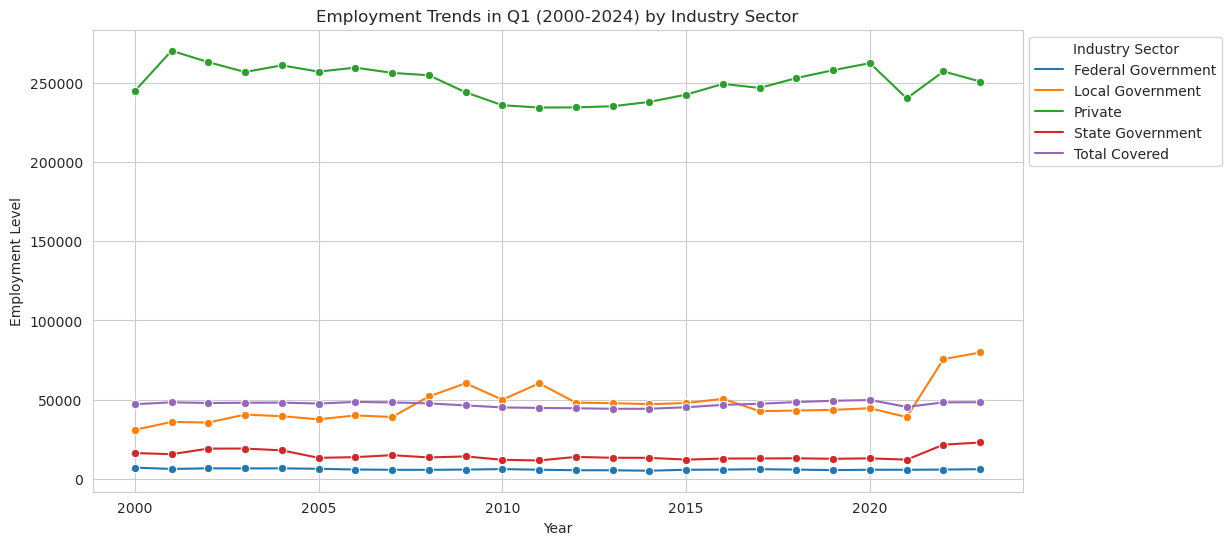

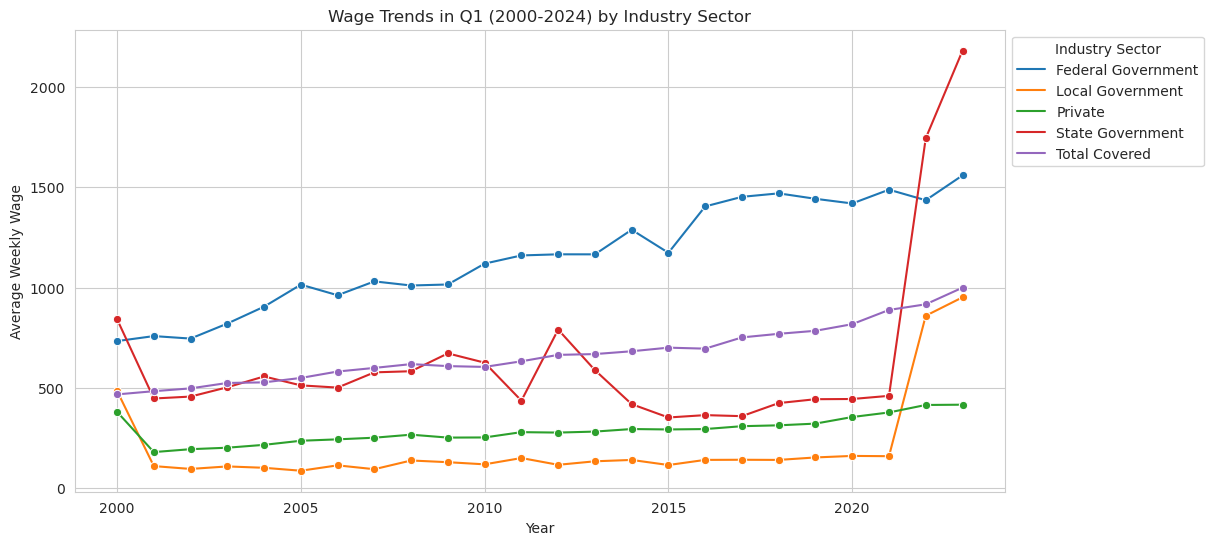

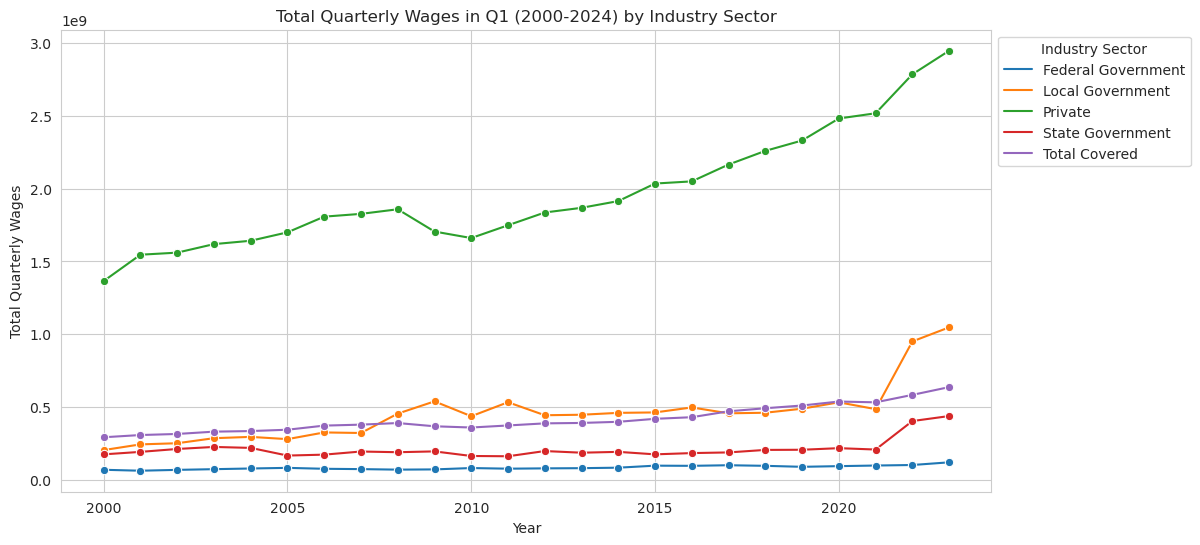

In [29]:
sns.set_style("whitegrid")

#Create a line plot: Employment Trends (Month 1 Employment)
plt.figure(figsize=(12, 6))
sns.lineplot(data=HCS_q1_grouped, x="year", y="month1_emplvl", hue="Industry Sector", marker="o")
plt.title("Employment Trends in Q1 (2000-2024) by Industry Sector")
plt.xlabel("Year")
plt.ylabel("Employment Level")
plt.legend(title="Industry Sector", bbox_to_anchor=(1,1))
plt.show()

#Create a line plot: Wage Trends (Average Weekly Wage)
plt.figure(figsize=(12,6))
sns.lineplot(data=HCS_q1_grouped, x="year", y="avg_wkly_wage", hue="Industry Sector", marker="o")
plt.title("Wage Trends in Q1 (2000-2024) by Industry Sector")
plt.xlabel("Year")
plt.ylabel("Average Weekly Wage")
plt.legend(title="Industry Sector", bbox_to_anchor=(1,1))
plt.show()

#Create a line plot: Total Quarterly Wages
plt.figure(figsize=(12,6))
sns.lineplot(data=HCS_q1_grouped, x="year", y="total_qtrly_wages", hue="Industry Sector", marker="o")
plt.title("Total Quarterly Wages in Q1 (2000-2024) by Industry Sector")
plt.xlabel("Year")
plt.ylabel("Total Quarterly Wages")
plt.legend(title="Industry Sector", bbox_to_anchor=(1,1))
plt.show()

### Here we used month 1 only the reason is to avoid cluttering and due to the fact month 2 and month 3 may not have drastic changes. However, we can use an average number if necessary.

## Introduction to the Freddie Mac Mortgage Rate Dataset
The Freddie Mac Primary Mortgage Market Survey® (PMMS®) is one of the most widely referenced sources for U.S. mortgage interest rates. Conducted weekly, it provides benchmark mortgage rates based on a survey of lenders across the country. The dataset is instrumental in analyzing long-term borrowing costs, housing affordability, and macroeconomic conditions influencing the real estate market.

## Key Variables in the Dataset

The Freddie Mac dataset includes:

Mortgage Rate (%) – The average interest rate charged for 15-year and 30-year fixed mortgages.

Points and Fees (%) – Average discount points and origination fees associated with the mortgage rate.

Loan Terms – Standardized at 15 and 30 years for fixed-rate mortgages.

Survey Week Date – The date for which the rate was recorded, providing a historical trend of mortgage rates.

In [30]:
#Specify the path to the .xlsx file
file_path = "Freddie Mac Prime Mortgage Rate.xlsx"

#Freddie Mac has a header so we need to skip the first few rows of irrelevant information    
#Adjust the number of rows to skip on the file's structure
fmpmr = pd.read_excel(file_path, sheet_name=None, header=2, skiprows=3)
fmpmr

{'Full History':                                              Unnamed: 0 30 yr  fees & 15 yr   
 0                                                  Week   FRM  points   FRM  \
 1                                   1971-04-02 00:00:00  7.33     NaN   NaN   
 2                                   1971-04-09 00:00:00  7.31           NaN   
 3                                   1971-04-16 00:00:00  7.31           NaN   
 4                                   1971-04-23 00:00:00  7.31           NaN   
 ...                                                 ...   ...     ...   ...   
 2815                                2025-03-06 00:00:00  6.63     NaN  5.79   
 2816                                2025-03-13 00:00:00  6.65     NaN   5.8   
 2817                                2025-03-20 00:00:00  6.67     NaN  5.83   
 2818                                2025-03-27 00:00:00  6.65     NaN  5.89   
 2819  Although Freddie Mac attempts to provide relia...   NaN     NaN   NaN   
 
      fees &.1  5/1 fe

In [31]:
#We are going to access the first sheet of the excel sheet
Freddie_Mac_df = fmpmr["Full History"]
#WE will clean up the column names by stripping any extra spaces or unecessary special characters
Freddie_Mac_df.columns = Freddie_Mac_df.columns.str.replace(r'\s+', '', regex=True)
Freddie_Mac_df

,Unnamed:0,30yr,fees&,15yr,fees&.1,5/1,fees&.2,5/1ARM,5/1ARM.1
0,Week,FRM,points,FRM,points,ARM,points,margin,spread
1,1971-04-02 00:00:00,7.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1971-04-09 00:00:00,7.31,,NaN,NaN,NaN,NaN,NaN,NaN
3,1971-04-16 00:00:00,7.31,,NaN,NaN,NaN,NaN,NaN,NaN
4,1971-04-23 00:00:00,7.31,,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2815,2025-03-06 00:00:00,6.63,NaN,5.79,NaN,NaN,NaN,NaN,NaN
2816,2025-03-13 00:00:00,6.65,NaN,5.8,NaN,NaN,NaN,NaN,NaN
2817,2025-03-20 00:00:00,6.67,NaN,5.83,NaN,NaN,NaN,NaN,NaN
2818,2025-03-27 00:00:00,6.65,NaN,5.89,NaN,NaN,NaN,NaN,NaN


### The column names are not quite understandable, we will go ahead and make them more comprehensible.

In [32]:
new_columns = ['Date', '30 yr FRM', '30 yr FRM Points', '15 yr FRM', '15 yr FRM Points', '5/1 ARM', '5/1 ARM Points', '5/1 ARM Margin', '5/1 ARM Spread']
Freddie_Mac_df.columns = new_columns
Freddie_Mac_df

,Date,30 yr FRM,30 yr FRM Points,15 yr FRM,15 yr FRM Points,5/1 ARM,5/1 ARM Points,5/1 ARM Margin,5/1 ARM Spread
0,Week,FRM,points,FRM,points,ARM,points,margin,spread
1,1971-04-02 00:00:00,7.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1971-04-09 00:00:00,7.31,,NaN,NaN,NaN,NaN,NaN,NaN
3,1971-04-16 00:00:00,7.31,,NaN,NaN,NaN,NaN,NaN,NaN
4,1971-04-23 00:00:00,7.31,,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2815,2025-03-06 00:00:00,6.63,NaN,5.79,NaN,NaN,NaN,NaN,NaN
2816,2025-03-13 00:00:00,6.65,NaN,5.8,NaN,NaN,NaN,NaN,NaN
2817,2025-03-20 00:00:00,6.67,NaN,5.83,NaN,NaN,NaN,NaN,NaN
2818,2025-03-27 00:00:00,6.65,NaN,5.89,NaN,NaN,NaN,NaN,NaN


### Amazing! Now here is what each of these columns mean:
| Field Name | Description |
|------------|------------|
| `Date` | The date when the mortgage rate data was recorded or reported (e.g., the week of the data point). |
| `30 yr FRM` | The interest rate for a 30-year Fixed-Rate Mortgage (FRM), which remains the same throughout the life of the loan. |
| `30 yr FRM Points` | The number of points (fees) paid upfront for the 30-year fixed-rate mortgage, where 1 point equals 1% of the loan amount. |
| `15 yr FRM` | The interest rate for a 15-year Fixed-Rate Mortgage (FRM), which remains the same over the life of the loan, but the loan term is half that of a 30-year loan. |
| `15 yr FRM Points` | The number of points (fees) paid upfront for the 15-year fixed-rate mortgage.|
| `5/1 ARM` | The interest rate for a 5/1 Adjustable-Rate Mortgage (ARM), which is fixed for the first 5 years and then adjusts annually based on market conditions. |
| `5/1 ARM Points` | The number of points (fees) paid upfront for the 5/1 adjustable-rate mortgage.|
| `5/1 ARM Margin` | The fixed margin added to the index rate after the initial 5-year fixed period in a 5/1 ARM, determining the adjustable rate.|
| `5/1 ARM Spread` | The difference (spread) between the interest rate on a 5/1 ARM and a comparable fixed-rate mortgage. It indicates how much higher or lower the ARM rate is compared to a fixed-rate mortgage.|

### For this research we are primarily interested in the Date, 30 yr FRM, and the 15 yr FRM. We will create a copy to the original and call it FMR

In [33]:
FMR_copy = Freddie_Mac_df[["Date", "30 yr FRM", "15 yr FRM"]].copy()
FMR_copy

,Date,30 yr FRM,15 yr FRM
0,Week,FRM,FRM
1,1971-04-02 00:00:00,7.33,NaN
2,1971-04-09 00:00:00,7.31,NaN
3,1971-04-16 00:00:00,7.31,NaN
4,1971-04-23 00:00:00,7.31,NaN
...,...,...,...
2815,2025-03-06 00:00:00,6.63,5.79
2816,2025-03-13 00:00:00,6.65,5.8
2817,2025-03-20 00:00:00,6.67,5.83
2818,2025-03-27 00:00:00,6.65,5.89


### We can now drop the first row of our dataset as this has our column titles as well as the last row that has Freddie Macs disclaimer.

In [34]:
FMR_copy = FMR_copy.drop(index=0)
FMR_copy = FMR_copy.drop(index=FMR_copy.index[-1])
FMR_copy.reset_index(drop=True, inplace=True)
FMR_copy

,Date,30 yr FRM,15 yr FRM
0,1971-04-02 00:00:00,7.33,NaN
1,1971-04-09 00:00:00,7.31,NaN
2,1971-04-16 00:00:00,7.31,NaN
3,1971-04-23 00:00:00,7.31,NaN
4,1971-04-30 00:00:00,7.29,NaN
...,...,...,...
2813,2025-02-27 00:00:00,6.76,5.94
2814,2025-03-06 00:00:00,6.63,5.79
2815,2025-03-13 00:00:00,6.65,5.8
2816,2025-03-20 00:00:00,6.67,5.83


### We are interested in looking at data from a span of 25 years or 2000-2024. But first we need to ensure the "Date" column is in datetime format.

In [35]:
# Ensure the 'Date' column is in datetime format
FMR_copy['Date'] = pd.to_datetime(FMR_copy['Date'])

# Filter rows where the year is greater than or equal to 2000
FMR_copy = FMR_copy[FMR_copy['Date'].dt.year >= 2000]

# Now df_copy contains only rows with dates from the year 2000 and onwards
FMR_copy

,Date,30 yr FRM,15 yr FRM
1501,2000-01-07,8.15,7.73
1502,2000-01-14,8.18,7.78
1503,2000-01-21,8.26,7.86
1504,2000-01-28,8.25,7.84
1505,2000-02-04,8.25,7.85
...,...,...,...
2813,2025-02-27,6.76,5.94
2814,2025-03-06,6.63,5.79
2815,2025-03-13,6.65,5.8
2816,2025-03-20,6.67,5.83


In [36]:
# Ensure the 'Date' column is in datetime format
FMR_copy['Date'] = pd.to_datetime(FMR_copy['Date'])

# Extract Year and Month from the 'Date' column and create a new column 'Year-Month'
FMR_copy['Year-Month'] = FMR_copy['Date'].dt.to_period('M')

# Group by 'Year-Month' and calculate the mean for each group
monthly_avg = FMR_copy.groupby('Year-Month').mean()

# Reset the index to make 'Year-Month' a regular column
monthly_avg.reset_index(inplace=True)

# Create a new column 'Monthly average' with the calculated monthly averages
# If you want to display these as separate columns for each original column (e.g., '30 yr FRM' and '15 yr FRM')
monthly_avg['30/15 average'] = monthly_avg[['30 yr FRM', '15 yr FRM']].mean(axis=1)

# Now, 'monthly_avg' contains the averages for each month with a 'Monthly average' column
monthly_avg

/tmp/ipykernel_143/446571462.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FMR_copy['Date'] = pd.to_datetime(FMR_copy['Date'])
/tmp/ipykernel_143/446571462.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FMR_copy['Year-Month'] = FMR_copy['Date'].dt.to_period('M')


,Year-Month,Date,30 yr FRM,15 yr FRM,30/15 average
0,2000-01,2000-01-17 12:00:00,8.21,7.8025,8.00625
1,2000-02,2000-02-14 12:00:00,8.325,7.9325,8.12875
2,2000-03,2000-03-17 00:00:00,8.24,7.832,8.036
3,2000-04,2000-04-17 12:00:00,8.1525,7.8,7.97625
4,2000-05,2000-05-15 12:00:00,8.515,8.1825,8.34875
...,...,...,...,...,...
298,2024-11,2024-11-17 06:00:00,6.805,6.0275,6.41625
299,2024-12,2024-12-15 12:00:00,6.715,5.93,6.3225
300,2025-01,2025-01-16 00:00:00,6.958,6.164,6.561
301,2025-02,2025-02-16 12:00:00,6.8425,6.03,6.43625


In [37]:
# Extract year and quarter from the date
FMR_copy['year_qtr'] = FMR_copy['Date'].dt.to_period('Q')

# Group by year-quarter and compute mean mortgage rates
quarterly_mortgage_rates = FMR_copy.groupby('year_qtr').agg({
    '30 yr FRM': 'mean',
    '15 yr FRM': 'mean'
}).reset_index()

# Optional: Rename columns for clarity
quarterly_mortgage_rates.columns = ['year_qtr', '30yr_avg', '15yr_avg']

# Convert 'year_qtr' to string if preferred
quarterly_mortgage_rates['year_qtr'] = quarterly_mortgage_rates['year_qtr'].astype(str)

# Display result
quarterly_mortgage_rates

/tmp/ipykernel_143/904473439.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FMR_copy['year_qtr'] = FMR_copy['Date'].dt.to_period('Q')


,year_qtr,30yr_avg,15yr_avg
0,2000Q1,8.256923,7.853846
1,2000Q2,8.316154,7.991538
2,2000Q3,8.02,7.733077
3,2000Q4,7.620769,7.294615
4,2001Q1,7.006923,6.589231
...,...,...,...
96,2024Q1,6.748462,6.053077
97,2024Q2,6.995385,6.271538
98,2024Q3,6.508462,5.692308
99,2024Q4,6.632308,5.832308


### There we go now we want to go ahead and separate the year and qtr.

In [38]:
#Extract year and qtr using regex
quarterly_mortgage_rates[["year", "qtr"]] = quarterly_mortgage_rates["year_qtr"].str.extract(r'(\d{4})Q(\d)')

#covert year and qtr toints for numerical analysuis
quarterly_mortgage_rates["year"] = quarterly_mortgage_rates["year"].astype(int)
quarterly_mortgage_rates["qtr"] = quarterly_mortgage_rates["qtr"].astype(int)
quarterly_mortgage_rates

,year_qtr,30yr_avg,15yr_avg,year,qtr
0,2000Q1,8.256923,7.853846,2000,1
1,2000Q2,8.316154,7.991538,2000,2
2,2000Q3,8.02,7.733077,2000,3
3,2000Q4,7.620769,7.294615,2000,4
4,2001Q1,7.006923,6.589231,2001,1
...,...,...,...,...,...
96,2024Q1,6.748462,6.053077,2024,1
97,2024Q2,6.995385,6.271538,2024,2
98,2024Q3,6.508462,5.692308,2024,3
99,2024Q4,6.632308,5.832308,2024,4


### We can go ahead and eliminate year_qtr and rearrange our columns for a cleaner dataframe.

In [39]:
quarterly_mortgage_rates = quarterly_mortgage_rates.drop("year_qtr", axis=1)
clean_columns = ["year", "qtr", "15yr_avg", "30yr_avg"]
cleaned_quarterly_mortgage_rates = quarterly_mortgage_rates[clean_columns]
cleaned_quarterly_mortgage_rates = cleaned_quarterly_mortgage_rates.iloc[:-1]
cleaned_quarterly_mortgage_rates

,year,qtr,15yr_avg,30yr_avg
0,2000,1,7.853846,8.256923
1,2000,2,7.991538,8.316154
2,2000,3,7.733077,8.02
3,2000,4,7.294615,7.620769
4,2001,1,6.589231,7.006923
...,...,...,...,...
95,2023,4,6.615385,7.303846
96,2024,1,6.053077,6.748462
97,2024,2,6.271538,6.995385
98,2024,3,5.692308,6.508462


### We can now do a macro analysis on this cleaned dataset! Let's do a timeseries for both 15yr_avg and 30yr_avg.

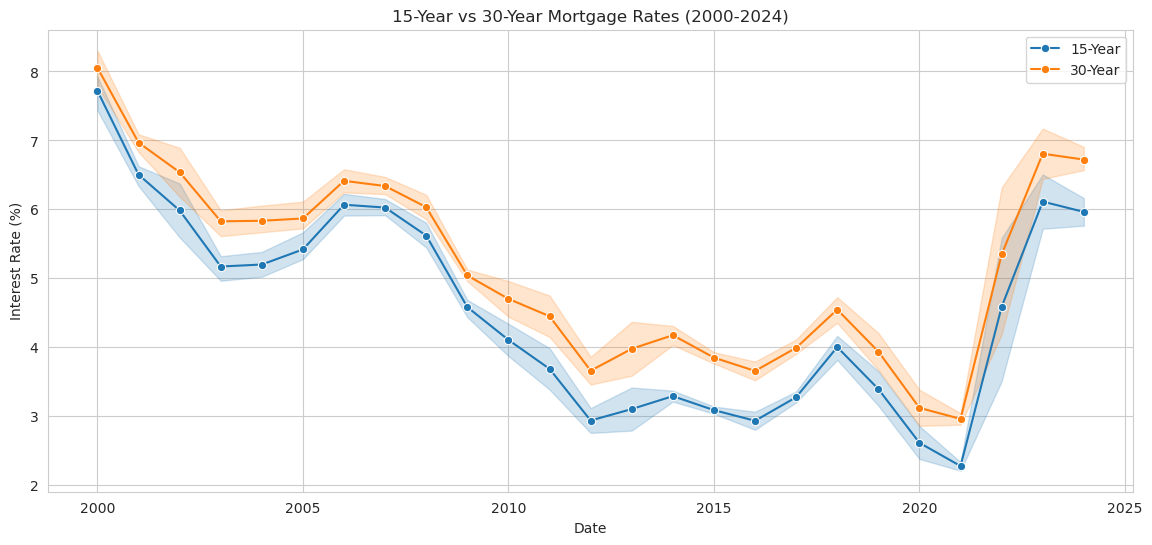

In [40]:
plt.figure(figsize=(14,6))
sns.lineplot(data=cleaned_quarterly_mortgage_rates,x="year", y="15yr_avg", label="15-Year", marker="o")
sns.lineplot(data=cleaned_quarterly_mortgage_rates, x="year", y="30yr_avg", label="30-Year", marker="o")
plt.title("15-Year vs 30-Year Mortgage Rates (2000-2024)")
plt.xlabel("Date")
plt.ylabel("Interest Rate (%)")
plt.legend()
plt.grid(True)
plt.show()

### Awesome! We will be joining the cleaned_quarterly_mortgage_rates dataset with our main Hum_Co_Macro dataset. But before we do that, we have another dataset to import the Humboldt Economic Index.

### Introduction to the Humboldt Economic Index
The Humboldt Economic Index is produced by the Economics Department at Cal Poly Humboldt and provides the only monthly source of broad-based economic indicators for Humboldt County. Each month since January 1994 the Index has tracked six sectors of the Humboldt County economy (employment, energy consumption, home sales, lumber manufacturing, occupancy rates at hotels/motels/inns, and retail sales). We generate same-establishment data for lumber manufacturing, occupancy rates, and retail sales by tracking a sample of firms over time. We also generate data on the issuance of building permits, help-wanted ads in the Times-Standard, new claims for unemployment insurance, and orders for future lumber deliveries. The Index represents a unique collaborative effort involving participation and sponsorship from local businesses, state and county agencies, and non-government organizations.  The Index is published on the fifth day of each month.

### Key Variables in the Dataset
| Field Name | Description |
|------------|------------|
| `Median Home Price` | The median price of homes in that month, in USD.|
| `30-year Mortgage Rate` | The interest rate for a 30-year mortgage, in percentage.|
| `Prime Rate (1/24)` | The prime lending rate at the time, in percentage.|
| `Unemployment Rate (Previous Month)` | The unemployment rate from the previous month, in percentage.|
| `Monthly Rent` | The median cost of monthly rent for a home, in USD.|
| `Help Wanted Advertising` | Change in the help-wanted advertising index, in percentage.|
| `Building Permits` | Change in building permits, in percentage.|
| `Unemployment Claims` | Change in unemployment claims, in percentage.|
| `Manufacturing Orders` | Change in manufacturing orders, in percentage.|

In [57]:
import pandas as pd

file_path = 'Humboldt Economic Index 2000-2024.xlsx'

# Read the first/default sheet and assign to DataFrame named hcei
hcei = pd.read_excel(file_path)

In [58]:
hcei.head(10)

,Month,Year,Median Home Price,30 yr,Prime Rate 1/24,Unemployment Rate(-1 Month),Monthly Rent,Help Wanted Advertising,Building Permits,Unemployment Claims,Manufacturing Orders
0,January,2000,117500,0.08375,0.0850,6.5,765.47,-0.69,-45.08,-5.43,0.0211
1,February,2000,125000,0.08500,0.0875,6.1,736.55,0.45,33.37,13.10,-0.1777
2,March,2000,124275,0.08375,0.0875,6.3,761.90,17.27,0.25,-8.43,0.0049
3,April,2000,121077,0.08500,0.0900,6.0,756.18,-16.21,-1.28,-22.93,0.0283
4,May,2000,128900,0.08750,0.0950,6.7,771.35,-1.34,29.44,54.89,0.0856
5,June,2000,122500,0.08375,0.0950,6.5,820.45,6.13,-16.75,-16.53,0.0766
6,July,2000,130882,0.08375,0.0950,6.4,746.67,-13.60,-1.27,-16.57,0.0076
7,August,2000,136950,0.08125,0.0950,5.9,877.50,3.70,-19.06,25.00,0.0913
8,September,2000,135000,0.08125,0.0950,5.7,848.78,14.66,47.02,-13.75,0.0768
9,October,2000,135000,0.07750,0.0950,5.3,847.08,8.80,-22.49,23.92,0.0510


In [59]:
hcei.tail(10)

,Month,Year,Median Home Price,30 yr,Prime Rate 1/24,Unemployment Rate(-1 Month),Monthly Rent,Help Wanted Advertising,Building Permits,Unemployment Claims,Manufacturing Orders
290,March,2024,435000,0.0675,NaN,4.8,1968.17,-11.01,-38.45,11.85,NaN
291,April,2024,400000,0.0700,NaN,4.7,2260.26,-16.36,143.96,36.85,NaN
292,May,2024,460000,0.0675,NaN,4.3,2363.33,32.49,-27.01,-25.46,NaN
293,June,2024,492000,0.0725,NaN,5.1,2282.95,-30.65,20.42,8.94,NaN
294,July,2024,440000,0.0675,NaN,5.4,2410.11,52.77,-25.51,0.34,NaN
295,August,2024,429950,0.0650,NaN,6.0,2296.80,-22.33,15.16,-7.61,NaN
296,September,2024,426000,0.0675,NaN,5.5,2123.62,-2.88,-14.06,-11.29,NaN
297,October,2024,435000,0.0650,NaN,5.4,2166.08,-19.16,157.53,-16.11,NaN
298,November,2024,450000,0.0700,NaN,5.1,2203.39,-11.26,-68.69,9.68,NaN
299,December,2024,428675,NaN,NaN,5.0,2191.24,10.31,166.46,19.55,NaN


### We will start by eliminating columns we do not need. 30yr and the Prime Rate 1/24 can be eliminated as we have already cleaned the Freddie Mac dataset.

In [62]:
hcei = hcei.drop("30 yr",axis=1)
hcei = hcei.drop("Prime Rate 1/24",axis=1)
hcei

,Month,Year,Median Home Price,Unemployment Rate(-1 Month),Monthly Rent,Help Wanted Advertising,Building Permits,Unemployment Claims,Manufacturing Orders
0,January,2000,117500,6.5,765.47,-0.69,-45.08,-5.43,0.0211
1,February,2000,125000,6.1,736.55,0.45,33.37,13.10,-0.1777
2,March,2000,124275,6.3,761.90,17.27,0.25,-8.43,0.0049
3,April,2000,121077,6.0,756.18,-16.21,-1.28,-22.93,0.0283
4,May,2000,128900,6.7,771.35,-1.34,29.44,54.89,0.0856
...,...,...,...,...,...,...,...,...,...
295,August,2024,429950,6.0,2296.80,-22.33,15.16,-7.61,NaN
296,September,2024,426000,5.5,2123.62,-2.88,-14.06,-11.29,NaN
297,October,2024,435000,5.4,2166.08,-19.16,157.53,-16.11,NaN
298,November,2024,450000,5.1,2203.39,-11.26,-68.69,9.68,NaN


### Now we can see there are various missing values we will try to obtain them as best we can and fill these in later. For now we want to focus on the way this data is formatted. We can see that our wage data is broken down into quarters, whereas our economic index data is broken down monthly.

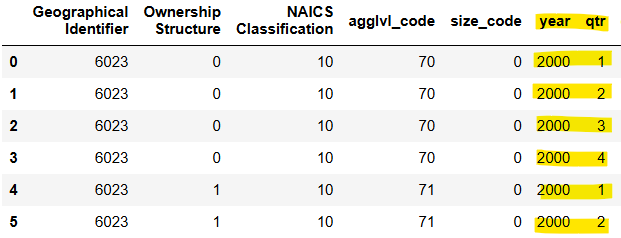

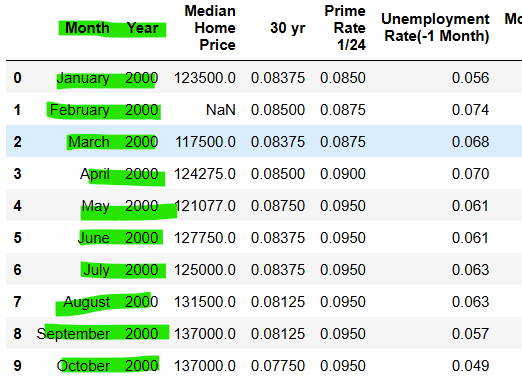

### This means we need to convert on of our datasets. For this project we will convert the economic index into quarterly values.

In the context of labor statistics, especially in the U.S. Department of Labor (Bureau of Labor Statistics, or BLS), the "quarter" typically refers to a three-month period within a year. The year is divided into four quarters:

First Quarter (Q1): January 1 – March 31

Second Quarter (Q2): April 1 – June 30

Third Quarter (Q3): July 1 – September 30

Fourth Quarter (Q4): October 1 – December 31

How this relates to labor statistics:
Quarterly data collection: Labor force data, employment figures, and economic indicators are often collected and reported on a quarterly basis. This helps to understand trends and changes in the labor market over time.

Surveys and Reports: Many of the reports from the BLS, such as the Employment Situation Report, are released monthly but may include quarterly analysis or summaries of trends.

In [63]:
### Let's check the type of values
hcei.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Month                        300 non-null    object 
 1   Year                         300 non-null    int64  
 2   Median Home Price            300 non-null    int64  
 3   Unemployment Rate(-1 Month)  300 non-null    float64
 4   Monthly Rent                 274 non-null    float64
 5   Help Wanted Advertising      300 non-null    float64
 6   Building Permits             299 non-null    float64
 7   Unemployment Claims          300 non-null    float64
 8   Manufacturing Orders         184 non-null    float64
dtypes: float64(6), int64(2), object(1)
memory usage: 21.2+ KB


### We can make a copy and call it h_economic_index

In [66]:
h_economic_index = hcei.copy()

In [68]:
# Convert "Month" and "Year" to a datetime format
h_economic_index["Date"] = pd.to_datetime(h_economic_index["Month"] + " " + h_economic_index["Year"].astype(str))

# Drop original Month and Year Columns
h_economic_index.drop(columns=["Month", "Year"], inplace=True)

# Set the date as an index
h_economic_index.set_index("Date", inplace=True)

# Resample data to quarterly Q using mean
h_economic_index_quarterly = h_economic_index.resample("Q").mean()

# Add Quarter and Year Columns using the correct index
h_economic_index_quarterly["Quarter"] = h_economic_index_quarterly.index.quarter
h_economic_index_quarterly["Year"] = h_economic_index_quarterly.index.year

# Reset index for better visibility and readability
h_economic_index_quarterly.reset_index(drop=True, inplace=True)

# Reorder Columns for clarity
h_economic_index_quarterly = h_economic_index_quarterly[[
    "Year", "Quarter", "Median Home Price", "Monthly Rent",
    "Unemployment Rate(-1 Month)", "Unemployment Claims", "Manufacturing Orders",
    "Help Wanted Advertising", "Building Permits"
]]

print(h_economic_index_quarterly)


KeyError: 'Month'